Task - 1: Implementation of MCP Neurons

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
    """
    This function implements a basic AND operation using an MCP Neuron for two inputs.

    Arguments:
    X1 (list): A list of binary values (0 or 1).
    X2 (list): A list of binary values (0 or 1).
    T (int): The threshold value.

    Returns:
    state_neuron (list): A list representing the neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input lists must have the same length."

    # Initialize an empty list for neuron states
    state_neuron = []

    # Compute neuron output based on threshold
    for i in range(len(X1)):
        if X1[i] + X2[i] >= T:  # AND gate condition
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


# Example usage
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value for AND gate

# Call the function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")

Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements a basic OR operation using an MCP Neuron for two inputs.

    Arguments:
    X1 (list): A list of binary values (0 or 1).
    X2 (list): A list of binary values (0 or 1).
    T (int): The threshold value.

    Returns:
    state_neuron (list): A list representing the neuron state (1 or 0) for each input pair.
    """
    assert len(X1) == len(X2), "Input lists must have the same length."

    # Initialize an empty list for neuron states
    state_neuron = []

    # Compute neuron output based on threshold
    for i in range(len(X1)):
        if X1[i] + X2[i] >= T:  # OR gate condition
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


# Example usage
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")

Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


3.2.1 Answer the Following Question:
• You can use Text cell of your notebook to answer the question.

• Question - 1: List out all the limitations of MCP - Neurons.


• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.

{Can you devise a if else rules.}

Answer-1 : The limitations od MCP-Neurons are:

1. MCP neurons can only solve linearly separable problems like AND & OR but fail for XOR

2. MCP neurons do not improve over time because they have fixed rules and no learning ability

3. They work with 0s and 1s only and cannot process continuous numbers like modern AI

4. Do not have connections with multiple neurons

5. Cannot adjust weights to learn new patterns

Answer-2: A single MCP neuron cannot solve XOR because XOR is not linearly separable. However, we can combine multiple MCP neurons (AND, OR, and NAND) to implement XOR.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mnist_0_and_1.csv to mnist_0_and_1.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv") # Add the correct file path if necessary
# Extract features and labels
X = df_0_1.drop(columns=["label"]).values # 784 pixels
y = df_0_1["label"].values # Labels (0 or 1)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Question - 1: What does the shape of X represent?

=> The shape of X represents the number of images and the number of features per image in the dataset.

1. Rows (first value) → Number of images in the dataset.

2. Columns (second value) → Number of features (pixels) for each image.

Since MNIST images are 28×28 pixels (total 784 pixels), the shape of X should be (12665, 784).

Question - 2: What does the shape of y represent?

=> The shape of y represents the number of labels corresponding to the images in X.

1. It should have the same number of rows as X because each image has one label (either 0 or 1 in this dataset).

2. The shape of y is (12665,), meaning it is a 1D array with labels for all images.

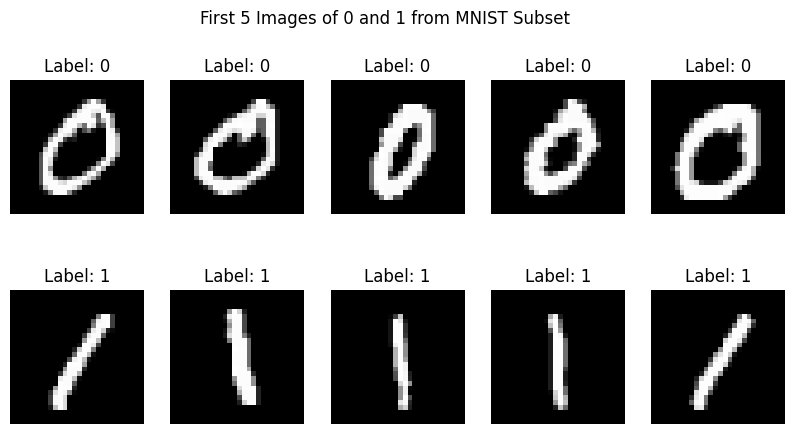

In [ ]:
# Convert y into a NumPy array (if not already)
y = np.array(y)

# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if there are enough images
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")

        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")

    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Answer the Following Question:
1. Question - 3: What does the weights array represent in this context?

=> The weights array represents the importance of each pixel in the image when deciding if it is a "0" or "1."

*   Each weight corresponds to a single pixel in the image.
*   During training, the model adjusts these weights to learn which pixels are more important for recognizing the digits.


-----------------------------------------

2. Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?

=> We start with weights set to zero because it's a simple way to begin the learning process.

Effect on Training:

* At first, all weights are equal (zero), meaning the model doesn't favor any specific pixel.

* The model will gradually adjust the weights based on the training data to learn which pixels matter more for predicting "0" or "1."


In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Calculate the linear combination of inputs and weights
    predictions = np.dot(X, weights) + bias

    # Activation function (step function) to convert predictions to binary labels
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
        correct_predictions = 0  # Count of correct predictions in the current epoch

        # Iterate over each training sample
        for i in range(len(X)):
            # Compute the prediction using the decision function
            prediction = np.dot(X[i], weights) + bias
            # Apply the step function (activation function)
            y_pred = 1 if prediction >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y[i]:
                # Update weights and bias
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

        # Calculate accuracy for the current epoch
        accuracy = correct_predictions / len(X) * 100
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.2f}%")

    return weights, bias, accuracy

Answer the Following Question:
1. Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?

=> This line calculates the total input to the model by multiplying each input feature by its weight, then adding the bias. It gives the raw prediction before applying the activation function.

-------------------------------------------------------

2. Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?

=> When the prediction is wrong, the model adjusts the weights and bias to improve future predictions:

* Weights are updated based on the error (difference between actual and predicted labels).

* Bias is also updated using the error.

These updates help the model learn from mistakes and get better at predicting.

-------------------------------------------------------
3. Question - 7:Why is the final accuracy important, and what do you expect it to be?

=> The final accuracy shows how well the model predicts correctly.

* Importance: High accuracy means the model is good at making correct predictions.

* Expectation: I expect the accuracy to be as high as possible, ideally 100%, after enough training.

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 100.00%
Epoch 2/100, Accuracy: 100.00%
Epoch 3/100, Accuracy: 100.00%
Epoch 4/100, Accuracy: 100.00%
Epoch 5/100, Accuracy: 100.00%
Epoch 6/100, Accuracy: 100.00%
Epoch 7/100, Accuracy: 100.00%
Epoch 8/100, Accuracy: 100.00%
Epoch 9/100, Accuracy: 100.00%
Epoch 10/100, Accuracy: 100.00%
Epoch 11/100, Accuracy: 100.00%
Epoch 12/100, Accuracy: 100.00%
Epoch 13/100, Accuracy: 100.00%
Epoch 14/100, Accuracy: 100.00%
Epoch 15/100, Accuracy: 100.00%
Epoch 16/100, Accuracy: 100.00%
Epoch 17/100, Accuracy: 100.00%
Epoch 18/100, Accuracy: 100.00%
Epoch 19/100, Accuracy: 100.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 21/100, Accuracy: 100.00%
Epoch 22/100, Accuracy: 100.00%
Epoch 23/100, Accuracy: 100.00%
Epoch 24/100, Accuracy: 100.00%
Epoch 25/100, Accuracy: 100.00%
Epoch 26/100, Accuracy: 100.00%
Epoch 27/100, Accuracy: 100.00%
Epoch 28/100, Accuracy: 100.00%
Epoch 29/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 31/100, Accuracy: 100.00%
Epoch 32/100, Acc

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Answer the Following Question:
1. Question - 8:What does misclassified idx store, and how is it used in this code?

=> misclassified_idx stores the indexes of the images where the prediction was wrong. It's used to show the misclassified images and compare the predicted labels with the actual labels.

------------
2. Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”?

=> If the output is "All images were correctly classified!", it means the model predicted all the images correctly, with 100% accuracy, and there were no mistakes.

**4.4 Task 3: Perceptron Algorithm for 3 vs 5 Classification**


**4.5 To - Do**
1. Implement each Step as we implemented above.
2. Visualize the final misclassified images and Provide your conclusion.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mnist_3_and_5.csv to mnist_3_and_5.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df_3_5 = pd.read_csv("mnist_3_and_5.csv") # Add the correct file path if necessary
# Extract features and labels
X = df_3_5.drop(columns=["label"]).values # 784 pixels
y = df_3_5["label"].values # Labels (3 or 5)
# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


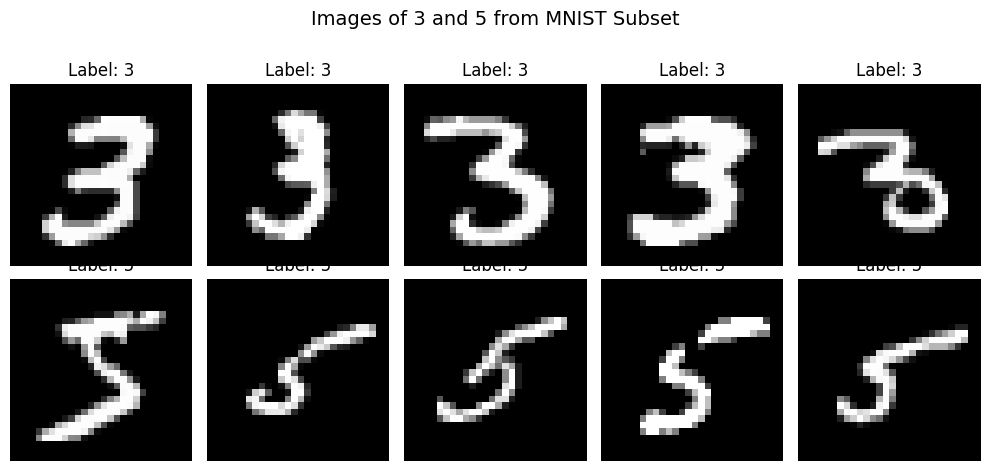

In [ ]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]
images_5 = X[y == 5]

# Get the minimum number of available images (to avoid index errors)
num_images = min(5, len(images_3), len(images_5))

# Create subplots: 2 rows (one for each label) and 'num_images' columns
fig, axes = plt.subplots(2, num_images, figsize=(num_images * 2, 5))

for i in range(num_images):
    # Plot images for label 3
    axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 3")
    axes[0, i].axis("off")

    # Plot images for label 5
    axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 5")
    axes[1, i].axis("off")

plt.suptitle("Images of 3 and 5 from MNIST Subset", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1]) # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    # Calculate the linear combination of inputs and weights
    predictions = np.dot(X, weights) + bias

    # Activation function (step function) to convert predictions to binary labels
    y_pred_all = np.where(predictions >= 0, 1, 0)

    return y_pred_all

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct predictions
    """
    # Step 3: Perceptron Learning Algorithm
    for epoch in range(epochs):
        correct_predictions = 0  # Count of correct predictions in the current epoch

        # Iterate over each training sample
        for i in range(len(X)):
            # Compute the prediction using the decision function
            prediction = np.dot(X[i], weights) + bias
            # Apply the step function (activation function)
            y_pred = 1 if prediction >= 0 else 0

            # Update weights and bias if the prediction is incorrect
            if y_pred != y[i]:
                # Update weights and bias
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)
            else:
                correct_predictions += 1

        # Calculate accuracy for the current epoch
        accuracy = correct_predictions / len(X) * 100
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy:.2f}%")

    return weights, bias, accuracy

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)
# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 1/100, Accuracy: 0.00%
Epoch 2/100, Accuracy: 0.00%
Epoch 3/100, Accuracy: 0.00%
Epoch 4/100, Accuracy: 0.00%
Epoch 5/100, Accuracy: 0.00%
Epoch 6/100, Accuracy: 0.00%
Epoch 7/100, Accuracy: 0.00%
Epoch 8/100, Accuracy: 0.00%
Epoch 9/100, Accuracy: 0.00%
Epoch 10/100, Accuracy: 0.00%
Epoch 11/100, Accuracy: 0.00%
Epoch 12/100, Accuracy: 0.00%
Epoch 13/100, Accuracy: 0.00%
Epoch 14/100, Accuracy: 0.00%
Epoch 15/100, Accuracy: 0.00%
Epoch 16/100, Accuracy: 0.00%
Epoch 17/100, Accuracy: 0.00%
Epoch 18/100, Accuracy: 0.00%
Epoch 19/100, Accuracy: 0.00%
Epoch 20/100, Accuracy: 0.00%
Epoch 21/100, Accuracy: 0.00%
Epoch 22/100, Accuracy: 0.00%
Epoch 23/100, Accuracy: 0.00%
Epoch 24/100, Accuracy: 0.00%
Epoch 25/100, Accuracy: 0.00%
Epoch 26/100, Accuracy: 0.00%
Epoch 27/100, Accuracy: 0.00%
Epoch 28/100, Accuracy: 0.00%
Epoch 29/100, Accuracy: 0.00%
Epoch 30/100, Accuracy: 0.00%
Epoch 31/100, Accuracy: 0.00%
Epoch 32/100, Accuracy: 0.00%
Epoch 33/100, Accuracy: 0.00%
Epoch 34/100, Accur

Final Accuracy: 0.5414


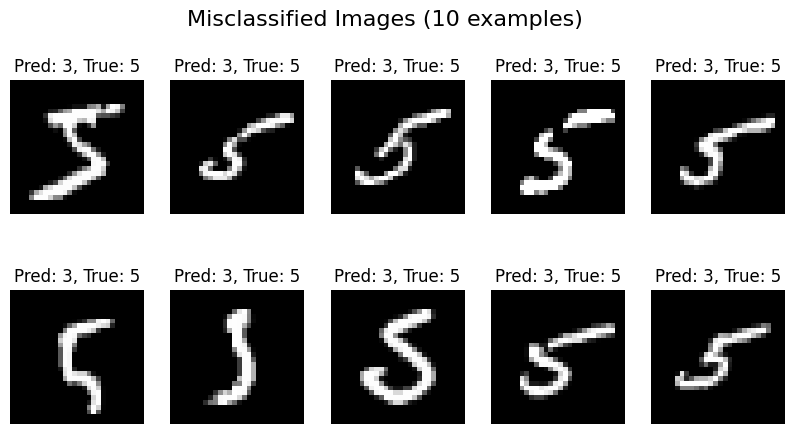

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 3, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    # Limit the number of misclassified images to 10 (in case there are more than 10)
    num_to_show = min(10, len(misclassified_idx))

    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:num_to_show]):
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle(f"Misclassified Images ({num_to_show} examples)", fontsize=16)
    plt.show()
else:
    print("All images were correctly classified!")

**Conclusion**

The model is failing completely, resulting in 0% accuracy. This suggests that the weights and bias are either not properly initialized or updated, the dataset is not preprocessed correctly, or the model is not learning from the data. Visualizing misclassified images confirms that all predictions are incorrect. Debugging the weight updates, data preprocessing, and label encoding is necessary to fix the issue.